In [32]:
import ujson as json, re

def extract_answer(response):
    # extract everything between ```python and ```
    return response.split("```python")[1].split("```")[0]

all_logs = []
with open("logs/logs.jsonl", "r") as f:
    for line in f:
        log = json.loads(line)
        log["score"] = log["eval_result"]["score"]
        log["num_response_chars"] = len(log["response"])
        log["num_response_words"] = len(log["response"].split())
        log["num_response_lines"] = log["response"].count("\n")
        log["answer"] = extract_answer(log["response"])
        log["num_answer_chars"] = len(log["answer"])
        log["num_answer_words"] = len(log["answer"].split())
        log["num_answer_lines"] = log["answer"].count("\n")

        # the answer with all the comments stripped
        # Remove both single-line (# ...) and multi-line ('''...''' or """...""") comments
        log["answer2"] = re.sub(r'(\"\"\".*?\"\"\"|\'\'\'.*?\'\'\'|#.*?$)', '', log["answer"], flags=re.DOTALL | re.MULTILINE)
        log["answer2"] = "\n".join([line for line in log["answer2"].split("\n") if line.strip()]) # remove any empty lines

        log["num_answer2_chars"] = len(log["answer2"])
        log["num_answer2_words"] = len(log["answer2"].split())
        log["num_answer2_lines"] = log["answer2"].count("\n")
        all_logs.append(log)

print(len(all_logs))

148181


In [27]:
import numpy as np, pandas as pd

# pd show 200 rows
pd.set_option('display.max_rows', 200)

keys = ["score", "num_response_chars", "num_response_words", "num_response_lines", "num_answer_chars", "num_answer_words", "num_answer_lines", "num_answer2_chars", "num_answer2_words", "num_answer2_lines"]
avg_stats = {key: {} for key in keys}
task_responses, task_answers, task_answers2 = {}, {}, {}
for log in all_logs:
    task_id = log["task_id"]
    
    for key in keys:
        if task_id not in avg_stats[key]:
            avg_stats[key][task_id] = []
        avg_stats[key][task_id].append(log[key])

    if task_id not in task_responses:
        task_responses[task_id] = []
        task_answers[task_id] = []
        task_answers2[task_id] = []
    task_responses[task_id].append(log["response"])
    task_answers[task_id].append(log["answer"])
    task_answers2[task_id].append(log["answer2"])

dataset = []
task_ids = list(avg_stats["score"].keys())
for task_id in task_ids:
    row = {"task_id": task_id}
    for key in keys:
        row[key] = np.mean(avg_stats[key][task_id])
    responses = task_responses[task_id]
    answers = task_answers[task_id]
    answers2 = task_answers2[task_id]
    row["unique_responses"] = 100.0 * len(set(responses)) / len(responses)
    row["unique_answers"] = 100.0 * len(set(answers)) / len(answers)
    row["unique_answers2"] = 100.0 * len(set(answers2)) / len(answers2)

    dataset.append(row)

dataset = sorted(dataset, key=lambda x: x["score"], reverse=True)
pd.DataFrame(dataset)

,task_id,score,num_response_chars,num_response_words,num_response_lines,num_answer_chars,num_answer_words,num_answer_lines,num_answer2_chars,num_answer2_words,num_answer2_lines,unique_responses,unique_answers,unique_answers2
0,sharded-HumanEval/44,1.000000,241.283530,32.621265,10.246699,229.283530,30.621265,10.246699,192.919388,26.152884,6.925643,15.427380,15.427380,9.589993
1,sharded-HumanEval/7,1.000000,163.385977,23.125354,5.160057,151.349150,21.119688,5.158640,147.308074,21.000000,2.000000,0.779037,0.708215,0.141643
2,sharded-HumanEval/73,1.000000,265.824476,39.356643,10.657343,253.824476,37.356643,10.657343,206.202797,30.069231,7.602797,5.944056,5.944056,3.286713
3,sharded-HumanEval/71,1.000000,239.112360,57.589888,8.271770,227.112360,55.589888,8.271770,210.929775,53.336376,5.657303,8.005618,8.005618,4.494382
4,sharded-livecodebench/2876,1.000000,135.671300,16.364837,3.728284,117.603892,13.378040,3.657401,114.254343,13.184851,1.535094,7.227241,5.420431,4.933982
5,sharded-HumanEval/111,0.999316,343.525308,43.132695,10.820793,331.525308,41.132695,10.820793,267.541040,31.740082,6.563611,56.908345,56.908345,43.296854
6,sharded-HumanEval/43,0.999311,252.171606,31.895245,10.976568,239.885596,29.842178,10.973811,151.332185,18.003446,5.995865,2.205376,2.136458,0.827016
7,sharded-livecodebench/2881,0.998624,264.357880,30.756366,8.012388,238.931865,26.658637,7.818307,203.800413,21.374398,5.201652,47.625602,46.524432,16.517550
8,sharded-livecodebench/2727,0.998594,157.892405,20.482419,6.466245,144.050633,18.170183,6.437412,140.261603,17.832630,4.388186,8.509142,7.735584,5.836850
9,sharded-HumanEval/90,0.998589,243.050106,29.823571,7.963303,231.050106,27.823571,7.963303,161.693013,17.625265,3.914608,12.491179,12.491179,7.974594


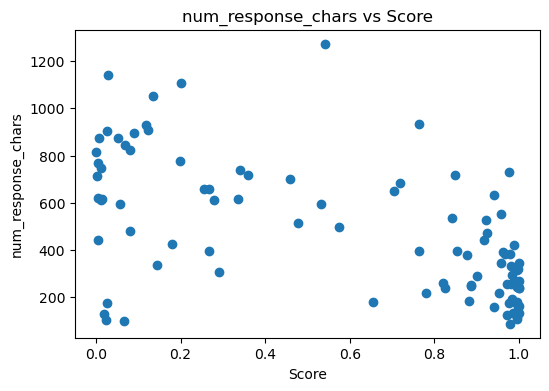

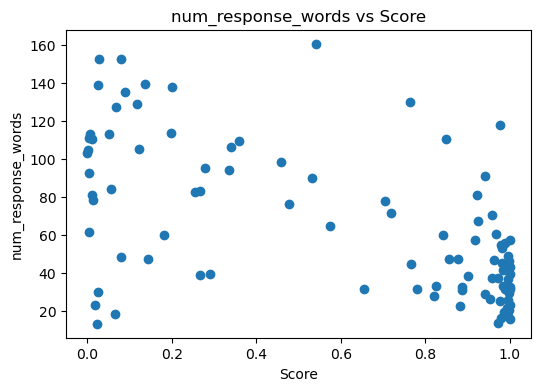

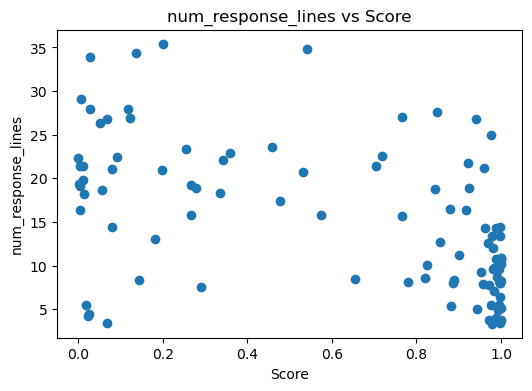

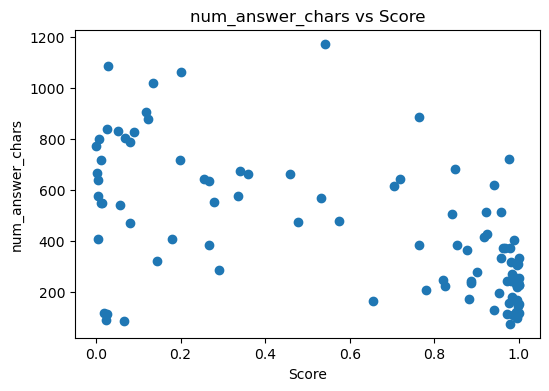

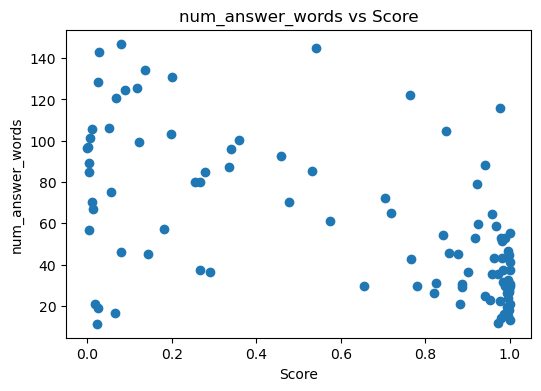

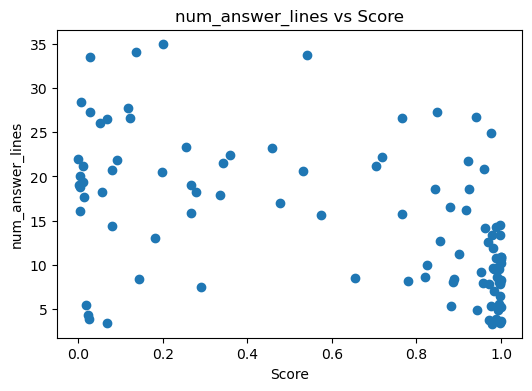

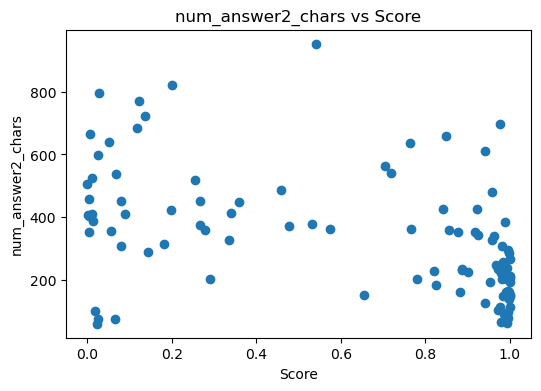

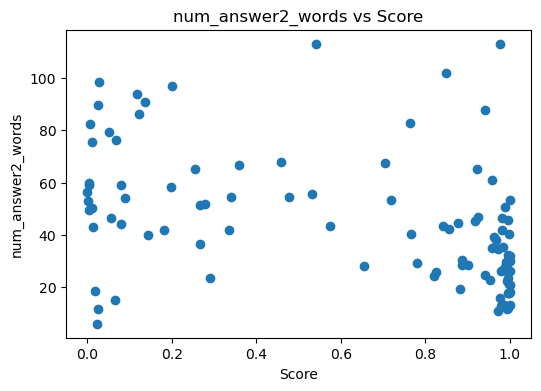

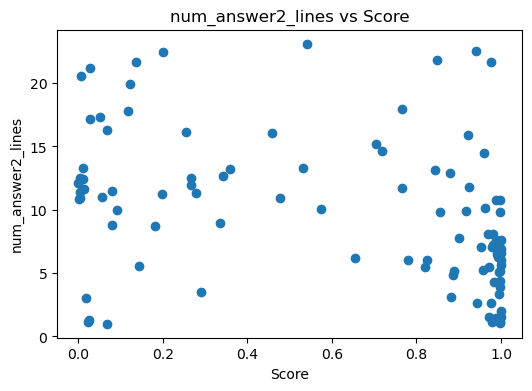

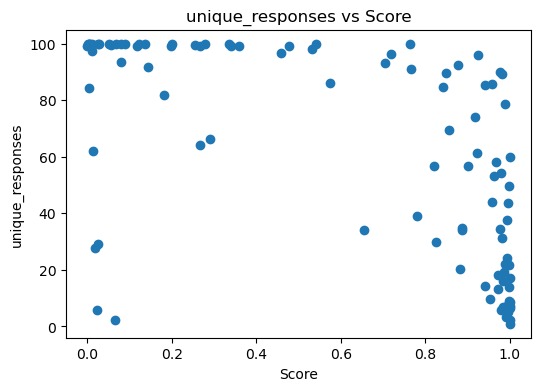

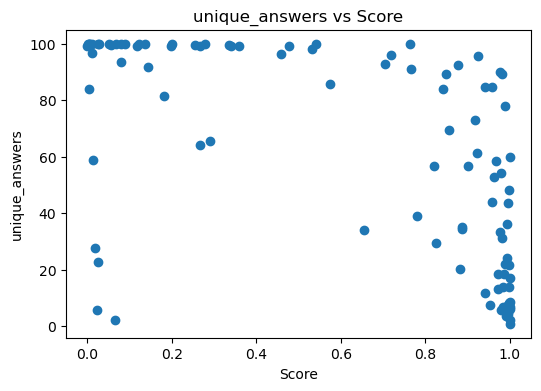

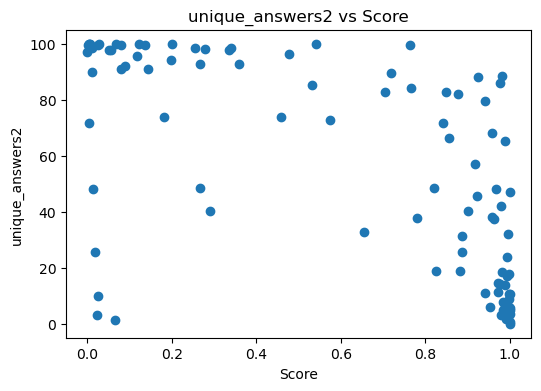

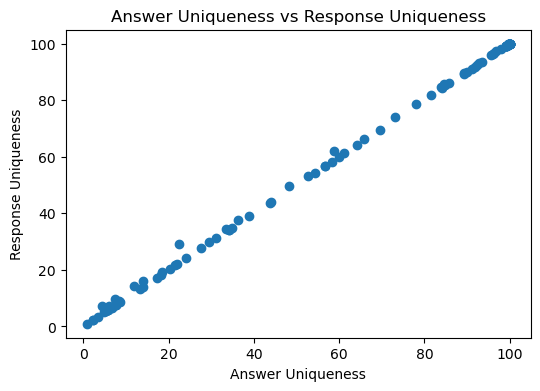

In [25]:
from matplotlib import pyplot as plt

scores = [row["score"] for row in dataset]
for k in keys + ["unique_responses", "unique_answers", "unique_answers2"]:
    if k == "score":
        continue
    values = [row[k] for row in dataset]
    plt.figure(figsize=(6, 4))
    plt.scatter(scores, values)
    plt.xlabel("Score")
    plt.ylabel(k)
    plt.title(f"{k} vs Score")

# plot answer_uniqueness vs. response_uniqueness
unique_answers = [row["unique_answers"] for row in dataset]
unique_responses = [row["unique_responses"] for row in dataset]
plt.figure(figsize=(6, 4))
plt.scatter(unique_answers, unique_responses)
plt.xlabel("Answer Uniqueness")
plt.ylabel("Response Uniqueness")
plt.title("Answer Uniqueness vs Response Uniqueness")
plt.show()